In [1]:
# Dependencies
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# import dependency to save summary stat as image
import dataframe_image as dfi

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Show the tables in the hawaii.sqlite db
Base.classes.keys()

['measurement', 'station']

In [3]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [5]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 6).all()
# june_temps

In [6]:
#  3. Convert the June temperatures to a list.
june_temps_list = [temp.tobs for temp in june_temps]
june_temps_list[:5]

[78.0, 76.0, 78.0, 76.0, 77.0]

In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps_list, columns=['June Temps'])
june_temps_df

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_ss = june_temps_df.describe()

# save summary stat display as an image
dfi.export(june_temp_ss, "Images/june_temp_summary_stats.png")
june_temp_ss

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 12).all()

In [10]:
# 7. Convert the December temperatures to a list.
dec_temps_list = [temp.tobs for temp in dec_temps]
dec_temps_list[:5]

[76.0, 74.0, 74.0, 64.0, 64.0]

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps_list, columns=['December Temps'])
dec_temps_df

,December Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp_ss = dec_temps_df.describe()

# save summary stat display as an image
dfi.export(dec_temp_ss, "Images/dec_temp_summary_stats.png")
dec_temp_ss

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## Additional visualizations for ReadMe file

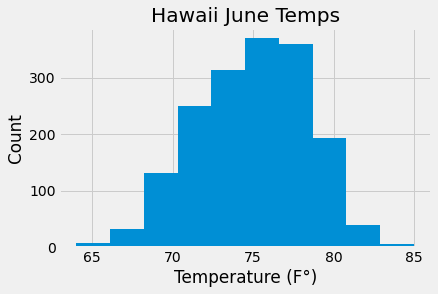

In [13]:
# Visualization for june df
june_temps_df.hist()
plt.tight_layout()
plt.title("Hawaii June Temps")
plt.xlabel('Temperature (F°)')
plt.ylabel("Count")
plt.show()

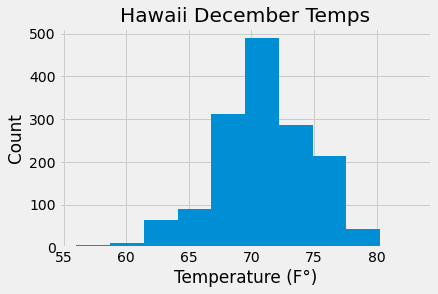

In [14]:
# Visualization for dec df
dec_temps_df.hist()
plt.tight_layout()
plt.title('Hawaii December Temps')
plt.xlabel('Temperature (F°)')
plt.ylabel("Count")
plt.show()

# D3 - Additional Queries

## June Queries

In [15]:
# How may records each station has for the month of June
session.query(Measurement.station, func.count(Measurement.station)).\
    filter(extract("month", Measurement.date) == 6).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519397', 236),
 ('USC00519281', 236),
 ('USC00513117', 236),
 ('USC00519523', 232),
 ('USC00516128', 223),
 ('USC00514830', 186),
 ('USC00511918', 165),
 ('USC00517948', 148),
 ('USC00518838', 38)]

In [16]:
# Avg precip recorded at each station for the month of June
june_avg_prcp = session.query(Measurement.station, func.avg(Measurement.prcp)).\
    filter(extract("month", Measurement.date) == 6).\
    group_by(Measurement.station).\
    order_by(func.avg(Measurement.prcp).desc()).all()

june_avg_prcp

[('USC00516128', 0.4957476635514022),
 ('USC00519281', 0.15152542372881356),
 ('USC00513117', 0.11824786324786322),
 ('USC00514830', 0.11419161676646702),
 ('USC00518838', 0.09461538461538463),
 ('USC00517948', 0.057974683544303796),
 ('USC00519523', 0.05004424778761062),
 ('USC00519397', 0.022660944206008553),
 ('USC00511918', 0.015157232704402513)]

In [17]:
# convert data to dataframe to allow charting
june_prcp_df = pd.DataFrame(june_avg_prcp, columns=["station", "avg_rainfall"])
june_prcp_df

,station,avg_rainfall
0,USC00516128,0.495748
1,USC00519281,0.151525
2,USC00513117,0.118248
3,USC00514830,0.114192
4,USC00518838,0.094615
5,USC00517948,0.057975
6,USC00519523,0.050044
7,USC00519397,0.022661
8,USC00511918,0.015157


In [18]:
# setting index (not necessary for the chart below)
june_prcp_df.set_index("station")

,avg_rainfall
station,
USC00516128,0.495748
USC00519281,0.151525
USC00513117,0.118248
USC00514830,0.114192
USC00518838,0.094615
USC00517948,0.057975
USC00519523,0.050044
USC00519397,0.022661
USC00511918,0.015157


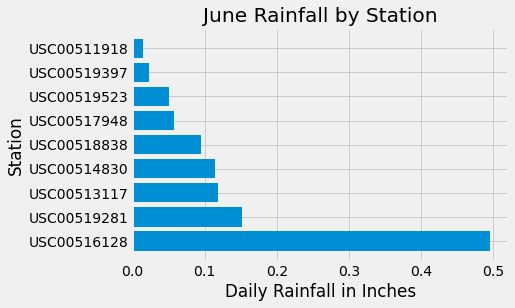

In [19]:
plt.barh(june_prcp_df["station"], june_prcp_df["avg_rainfall"])
plt.title("June Rainfall by Station")
plt.ylabel('Station')
plt.xlabel("Daily Rainfall in Inches")
plt.show()

### How often does it rain?

In [20]:
# Count how many times prcp is above 0 per station in June
june_rainday = session.query(Measurement.station, func.count(Measurement.prcp)).\
    filter(extract("month", Measurement.date) == 6).\
    where(Measurement.prcp > 0).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.prcp).desc()).all()
june_rainday

[('USC00516128', 198),
 ('USC00519281', 191),
 ('USC00513117', 169),
 ('USC00514830', 111),
 ('USC00519523', 90),
 ('USC00519397', 74),
 ('USC00511918', 44),
 ('USC00517948', 32),
 ('USC00518838', 18)]

In [21]:
june_rainday_df = pd.DataFrame(june_rainday, columns=["station", "# of rainy days"]).set_index("station")
june_rainday_df

,# of rainy days
station,
USC00516128,198
USC00519281,191
USC00513117,169
USC00514830,111
USC00519523,90
USC00519397,74
USC00511918,44
USC00517948,32
USC00518838,18


These numbers are misleading as some stations record significantly more frequently than others... Let's find percentages of rainy days instead

In [22]:
#### Reused from earlier, but this time setting it to a variable
# How may records each station has for the month of June
june_records = session.query(Measurement.station, func.count(Measurement.station)).\
    filter(extract("month", Measurement.date) == 6).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
june_records

[('USC00519397', 236),
 ('USC00519281', 236),
 ('USC00513117', 236),
 ('USC00519523', 232),
 ('USC00516128', 223),
 ('USC00514830', 186),
 ('USC00511918', 165),
 ('USC00517948', 148),
 ('USC00518838', 38)]

In [23]:
# Make into Pandas df for ease of manipulation
june_records_df = pd.DataFrame(june_records, columns=["station", "total records"]).set_index("station")
june_records_df

,total records
station,
USC00519397,236
USC00519281,236
USC00513117,236
USC00519523,232
USC00516128,223
USC00514830,186
USC00511918,165
USC00517948,148
USC00518838,38


In [24]:
complete_june_rain = pd.merge(june_rainday_df, june_records_df, on="station")
complete_june_rain

,# of rainy days,total records
station,,
USC00516128,198,223
USC00519281,191,236
USC00513117,169,236
USC00514830,111,186
USC00519523,90,232
USC00519397,74,236
USC00511918,44,165
USC00517948,32,148
USC00518838,18,38


In [25]:
# Create column to calculate % of rainy days
complete_june_rain["% rainy days"] = complete_june_rain["# of rainy days"] / complete_june_rain["total records"] * 100
complete_june_rain

,# of rainy days,total records,% rainy days
station,,,
USC00516128,198,223,88.789238
USC00519281,191,236,80.932203
USC00513117,169,236,71.610169
USC00514830,111,186,59.677419
USC00519523,90,232,38.793103
USC00519397,74,236,31.355932
USC00511918,44,165,26.666667
USC00517948,32,148,21.621622
USC00518838,18,38,47.368421


In [32]:
# Format decimal values of df
complete_june_rain["% rainy days"] = complete_june_rain["% rainy days"].map("{:.2f}".format)

# Save the image for the Report
dfi.export(complete_june_rain, "Images/june_rainy_days.png")
complete_june_rain

,# of rainy days,total records,% rainy days
station,,,
USC00516128,198,223,88.79
USC00519281,191,236,80.93
USC00513117,169,236,71.61
USC00514830,111,186,59.68
USC00519523,90,232,38.79
USC00519397,74,236,31.36
USC00511918,44,165,26.67
USC00517948,32,148,21.62
USC00518838,18,38,47.37


In [27]:
# check data types
complete_june_rain.dtypes

# of rainy days     int64
total records       int64
% rainy days       object
dtype: object

In [28]:
# change % rainy days to float
complete_june_rain["% rainy days"] = complete_june_rain["% rainy days"].astype(float)

complete_june_rain.dtypes

# of rainy days      int64
total records        int64
% rainy days       float64
dtype: object

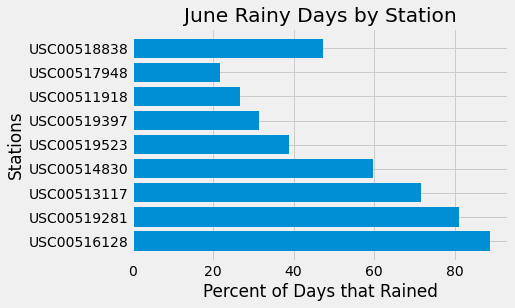

In [31]:
plt.barh(complete_june_rain.index, complete_june_rain["% rainy days"])
plt.xlabel("Percent of Days that Rained")
plt.ylabel("Stations")
plt.title("June Rainy Days by Station")
plt.show()

## December Queries

In [35]:
# How may records each station has for the month of December
session.query(Measurement.station, func.count(Measurement.station)).\
    filter(extract("month", Measurement.date) == 12).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 217),
 ('USC00513117', 216),
 ('USC00519523', 210),
 ('USC00519397', 210),
 ('USC00516128', 206),
 ('USC00514830', 178),
 ('USC00511918', 152),
 ('USC00517948', 109),
 ('USC00518838', 19)]

In [36]:
# Avg precip recorded at each station for the month of December
dec_avg_prcp = session.query(Measurement.station, func.avg(Measurement.prcp)).\
    filter(extract("month", Measurement.date) == 12).\
    group_by(Measurement.station).\
    order_by(func.avg(Measurement.prcp).desc()).all()

dec_avg_prcp

[('USC00518838', 0.6381818181818182),
 ('USC00516128', 0.5070050761421321),
 ('USC00519281', 0.2449308755760371),
 ('USC00513117', 0.20324074074074094),
 ('USC00519523', 0.1620098039215687),
 ('USC00514830', 0.15496598639455791),
 ('USC00517948', 0.15272727272727266),
 ('USC00511918', 0.13814569536423846),
 ('USC00519397', 0.07531400966183568)]

In [37]:
# convert data to dataframe to allow charting
dec_prcp_df = pd.DataFrame(dec_avg_prcp, columns=["station", "avg_rainfall"])
dec_prcp_df

,station,avg_rainfall
0,USC00518838,0.638182
1,USC00516128,0.507005
2,USC00519281,0.244931
3,USC00513117,0.203241
4,USC00519523,0.162010
5,USC00514830,0.154966
6,USC00517948,0.152727
7,USC00511918,0.138146
8,USC00519397,0.075314


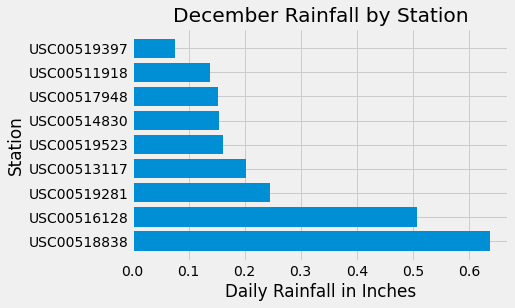

In [38]:
plt.barh(dec_prcp_df["station"], dec_prcp_df["avg_rainfall"])
plt.title("December Rainfall by Station")
plt.ylabel('Station')
plt.xlabel("Daily Rainfall in Inches")
plt.show()

### How often does it rain?

In [39]:
# Count how many times prcp is above 0 per station in December
dec_rainday = session.query(Measurement.station, func.count(Measurement.prcp)).\
    filter(extract("month", Measurement.date) == 12).\
    where(Measurement.prcp > 0).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.prcp).desc()).all()
dec_rainday

[('USC00519281', 167),
 ('USC00513117', 154),
 ('USC00516128', 153),
 ('USC00519523', 133),
 ('USC00519397', 98),
 ('USC00514830', 96),
 ('USC00511918', 55),
 ('USC00517948', 28),
 ('USC00518838', 11)]

In [40]:
dec_rainday_df = pd.DataFrame(dec_rainday, columns=["station", "# of rainy days"]).set_index("station")
dec_rainday_df

,# of rainy days
station,
USC00519281,167
USC00513117,154
USC00516128,153
USC00519523,133
USC00519397,98
USC00514830,96
USC00511918,55
USC00517948,28
USC00518838,11


In [41]:
#### Reused from earlier, but this time setting it to a variable
# How may records each station has for the month of December
dec_records = session.query(Measurement.station, func.count(Measurement.station)).\
    filter(extract("month", Measurement.date) == 12).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
dec_records

[('USC00519281', 217),
 ('USC00513117', 216),
 ('USC00519523', 210),
 ('USC00519397', 210),
 ('USC00516128', 206),
 ('USC00514830', 178),
 ('USC00511918', 152),
 ('USC00517948', 109),
 ('USC00518838', 19)]

In [42]:
# Make into Pandas df for ease of manipulation
dec_records_df = pd.DataFrame(dec_records, columns=["station", "total records"]).set_index("station")
dec_records_df

,total records
station,
USC00519281,217
USC00513117,216
USC00519523,210
USC00519397,210
USC00516128,206
USC00514830,178
USC00511918,152
USC00517948,109
USC00518838,19


In [43]:
complete_dec_rain = pd.merge(dec_rainday_df, dec_records_df, on="station")
complete_dec_rain

,# of rainy days,total records
station,,
USC00519281,167,217
USC00513117,154,216
USC00516128,153,206
USC00519523,133,210
USC00519397,98,210
USC00514830,96,178
USC00511918,55,152
USC00517948,28,109
USC00518838,11,19


In [44]:
# Create column to calculate % of rainy days
complete_dec_rain["% rainy days"] = complete_dec_rain["# of rainy days"] / complete_dec_rain["total records"] * 100
complete_dec_rain

,# of rainy days,total records,% rainy days
station,,,
USC00519281,167,217,76.958525
USC00513117,154,216,71.296296
USC00516128,153,206,74.271845
USC00519523,133,210,63.333333
USC00519397,98,210,46.666667
USC00514830,96,178,53.932584
USC00511918,55,152,36.184211
USC00517948,28,109,25.688073
USC00518838,11,19,57.894737


In [45]:
# Format decimal values of df
complete_dec_rain["% rainy days"] = complete_dec_rain["% rainy days"].map("{:.2f}".format)

# Save the image for the Report
dfi.export(complete_dec_rain, "Images/dec_rainy_days.png")
complete_dec_rain

,# of rainy days,total records,% rainy days
station,,,
USC00519281,167,217,76.96
USC00513117,154,216,71.30
USC00516128,153,206,74.27
USC00519523,133,210,63.33
USC00519397,98,210,46.67
USC00514830,96,178,53.93
USC00511918,55,152,36.18
USC00517948,28,109,25.69
USC00518838,11,19,57.89


In [46]:
# change % rainy days to float
complete_dec_rain["% rainy days"] = complete_dec_rain["% rainy days"].astype(float)

complete_dec_rain.dtypes

# of rainy days      int64
total records        int64
% rainy days       float64
dtype: object

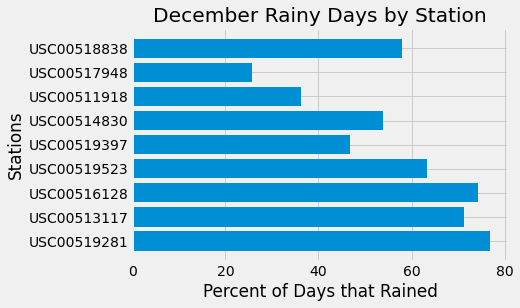

In [47]:
plt.barh(complete_dec_rain.index, complete_dec_rain["% rainy days"])
plt.xlabel("Percent of Days that Rained")
plt.ylabel("Stations")
plt.title("December Rainy Days by Station")
plt.show()